# Coffee Sales Analysis

![coffee_image](../../assets/coffee-image.jpeg "alt-coffee_image")

## About Author

Author: Joshua Farara

Project: title

### Contact Info
Click on link below to contact/follow/correct me:

Email: joshua.farara@gmail.com

[LinkedIn](https://www.linkedin.com/in/joshuafarara/)

[Facebook](https://www.facebook.com/josh.farara/)

[Twitter](https://x.com/FararaTheArtist)

[Github](https://github.com/JoshuaFarara)


## About Data

Title: Dataset Title

Dataset: [Link](https://www.kaggle.com/datasets/ihelon/coffee-sales/data)

Description of data:

This dataset contains detailed records of coffee sales from a vending machine. It is intended for analysis of purchasing patterns, sales trends, and customer preferences related to coffee products. The dataset spans from March 2024 to June 2024, capturing daily transaction data. And it's continue added new information.

### Dataset Columns Names

Features:


### Metadata

Source:

Collection Methodology:

License:



### Task

Describe task at hand for this dataset.

### Objectives

Describe objective at had for this dataset.

### Kernel Version Used

Python==3.11.7

## Import Libraries

We will use the following libraries¶
1. Pandas: Data manipulation and analysis
2. Numpy: Numerical operations and calculations
3. Matplotlib: Data visualization and plotting
4. Seaborn: Enhanced data visualization and statistical graphics
5. Scipy: Scientific computing and advanced mathematical operations

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import scipy as sp

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import sys

# # Get the directory of the current script
# script_dir = os.path.dirname(os.path.abspath(__file__))

# # Change the working directory to the script's directory
# os.chdir(script_dir)

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Data Loading and Exploration | Cleaning

### Load a CSV file then creating a dataframe

In [2]:
# Kaggle Notebook
# df = pd.read_csv('/kaggle/input/coffee-sales/index.csv')


#Local Machine Notebook
df = pd.read_csv('../../data/coffee_sales_data.csv')


### Set the option to show maximum columns

In [3]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

### Get a sneak peek of data
The purpose of a sneak peek is to get a quick overview of the data and identify any potential problems or areas of interest

In [4]:
df.head(5)

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


### Let's see the column names

In [5]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'], dtype='object')

### Let's have a look on the shape of the dataset

In [6]:
print(f"The Number of Rows are {df.shape[0]}, and columns are {df.shape[1]}.")

The Number of Rows are 896, and columns are 6.


### Let's have a look on the columns and their data types using detailed info function

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         896 non-null    object 
 1   datetime     896 non-null    object 
 2   cash_type    896 non-null    object 
 3   card         807 non-null    object 
 4   money        896 non-null    float64
 5   coffee_name  896 non-null    object 
dtypes: float64(1), object(5)
memory usage: 42.1+ KB


### Count the missing values

In [8]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

## Cleaning Set 1

* There are 896 rows, and 6 columns in the dataset.

* The data type of all columns are objects except for df['money'] which is float.

* The columns in the datasets are:
    * 'date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name'
    
* There are a few missing values in the dataset, which we will read in detail and deal with later on in the notebook.

* rename columns 'cash_type':'payment_type','card':'card_number', 'money':'amount_paid_uah'

* datetime converrted to a datetime dtype.

* money column after renaming 'amount_paid_uah' can derive an exchanged USD column for later comparison and analysis




### Task:

Clean the data by changing column names 


1. Change column names to appropriate names matching the data.
2. 

## Changing column names 

Changed: cash_type to payment_type since cash and card payments are accepted

In [9]:
df.rename(columns={'cash_type':'payment_type', 'card':'card_number', 'money':'amount_paid_uah'}, inplace=True)

In [10]:
df.columns

Index(['date', 'datetime', 'payment_type', 'card_number', 'amount_paid_uah',
       'coffee_name'],
      dtype='object')

## Creating Time Column

In [11]:
df[['new_date', 'time']] = df['datetime'].str.split(' ', n=1, expand=True)
df = df.drop(['new_date'], axis=1)
# df = df.drop(['new_date', 'datetime'], axis=1)
# df = ['date', 'time', 'payment_type', 'card_number', 'amount_paid_usd', 'coffee_name']

## Coverting datetime Column from object to datetime64 dtype

In [12]:
df['datetime']= pd.to_datetime(df['datetime'])
# Check type for the time column
# df['datetime'].info
df.head(10)

,date,datetime,payment_type,card_number,amount_paid_uah,coffee_name,time
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626
5,2024-03-01,2024-03-01 15:39:47.726,card,ANON-0000-0000-0005,33.8,Americano with Milk,15:39:47.726
6,2024-03-01,2024-03-01 16:19:02.756,card,ANON-0000-0000-0006,38.7,Hot Chocolate,16:19:02.756
7,2024-03-01,2024-03-01 18:39:03.580,card,ANON-0000-0000-0007,33.8,Americano with Milk,18:39:03.580
8,2024-03-01,2024-03-01 19:22:01.762,card,ANON-0000-0000-0008,38.7,Cocoa,19:22:01.762
9,2024-03-01,2024-03-01 19:23:15.887,card,ANON-0000-0000-0008,33.8,Americano with Milk,19:23:15.887


## Convert amount_paid_uah(formerly df['money']) to USD.

.024 USD  = 1 Ukrainian hryvnia

1 USD = 40.3317	Ukrainian hryvnia

In [13]:
UAH_to_USD = .024
df['amount_paid_usd'] = df['amount_paid_uah'] * UAH_to_USD

In [14]:
df.head(5)

,date,datetime,payment_type,card_number,amount_paid_uah,coffee_name,time,amount_paid_usd
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,10:15:50.520,0.9288
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:19:22.539,0.9288
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,12:20:18.089,0.9288
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,13:46:33.006,0.6936
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,13:48:14.626,0.9288


## Restructure dateframe order.

In [18]:
df = df[['date', 'datetime','time', 'payment_type', 'card_number', 'amount_paid_uah', 'amount_paid_usd',
       'coffee_name']]
df.head()

,date,datetime,time,payment_type,card_number,amount_paid_uah,amount_paid_usd,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,10:15:50.520,card,ANON-0000-0000-0001,38.7,0.9288,Latte
1,2024-03-01,2024-03-01 12:19:22.539,12:19:22.539,card,ANON-0000-0000-0002,38.7,0.9288,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,12:20:18.089,card,ANON-0000-0000-0002,38.7,0.9288,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,13:46:33.006,card,ANON-0000-0000-0003,28.9,0.6936,Americano
4,2024-03-01,2024-03-01 13:48:14.626,13:48:14.626,card,ANON-0000-0000-0004,38.7,0.9288,Latte


## Analytical Questions

Product analysis:
1. Total Revenue

2. Total Sales per Coffee 

3. Average amount paid per cup 
 
4. Average amount paid per cup for each coffee type in UAH

5. Which coffee had the highest/lowest sales?


Dates and Time analysis:
6. What is the most frequent time of sales at this vending machine?

7. Which coffee is sold in the morning, afternoon, evening?

8. Which coffee is sold most/least during the week/weekend?

9. Which dates have the highest sales?

10. What day's of the week do coffee sales occur the most? 

11. What are the sale amounts for the card numbers, frequency, total amount paid, coffee types?

12. Are there any holidays that cause a spike or decline in sales?

13. 

Consumer analysis:

14. What are the sale amounts for the card numbers, frequency, total amount paid, coffee types?

15. What is the ratio amongst card consumers and cash consumers?

16. Do cash consumers spend more then card counterparts?

Currency analysis:
17. What is the exchange rate between UAH and USD at the time of this data? Compared to the average?

18. 

### Coffee Sales Report

#### Product Analysis:

In [19]:
df['coffee_name'] = df['coffee_name'].astype('str') 

In [21]:
df[['coffee_name', 'amount_paid_uah']].head()

,coffee_name,amount_paid_uah
0,Latte,38.7
1,Hot Chocolate,38.7
2,Hot Chocolate,38.7
3,Americano,28.9
4,Latte,38.7


##### Plot total revenue

In [22]:
# 1. Total Revenue
total_revenue_uah = df['amount_paid_uah'].sum()
total_revenue_usd = df['amount_paid_usd'].sum()
print(f"Total Revenue (UAH): {total_revenue_uah}, Total Revenue (USD): {total_revenue_usd}")

Total Revenue (UAH): 30592.940000000002, Total Revenue (USD): 734.23056


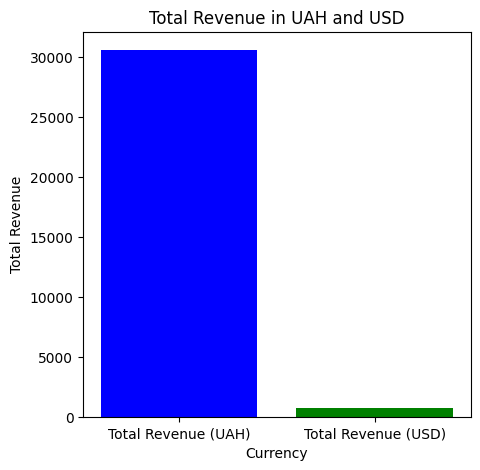

In [23]:
# Plot total revenue
plt.figure(figsize=(5, 5))
plt.bar(['Total Revenue (UAH)', 'Total Revenue (USD)'], [total_revenue_uah, total_revenue_usd], color=['blue', 'green'])
plt.xlabel('Currency')
plt.ylabel('Total Revenue')
plt.title('Total Revenue in UAH and USD')
# plt.savefig('./visualizations/Total Revenue in UAH and USD.jpg')
plt.show()

In [24]:
# Group data by coffee_name
grouped_coffee = df.groupby('coffee_name')

In [25]:
# 3. Total Sales per Coffee Type in UAH
total_amount_paid_uah = grouped_coffee['amount_paid_uah'].sum()
print(total_amount_paid_uah)

coffee_name
Americano              3786.42
Americano with Milk    6738.14
Cappuccino             6253.50
Cocoa                   995.66
Cortado                2422.80
Espresso                827.34
Hot Chocolate          2417.46
Latte                  7151.62
Name: amount_paid_uah, dtype: float64


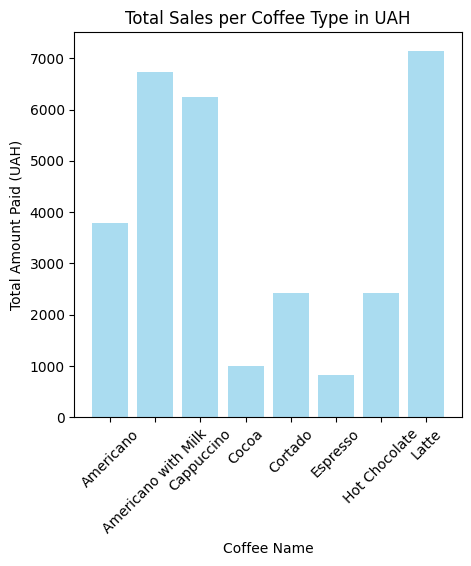

In [26]:
# Plot total sales per coffee type in UAH
plt.figure(figsize=(5, 5))
plt.bar(total_amount_paid_uah.index, total_amount_paid_uah, alpha=0.7, color='skyblue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Amount Paid (UAH)')
plt.title('Total Sales per Coffee Type in UAH')
plt.xticks(rotation=45)
# plt.savefig('./visualizations/Total Sales per Coffee Type in UAH.jpg')
plt.show()

##### Total Revenue by Coffee Name Avanced Plotting

In [27]:
# Group by coffee_name and calculate total revenue
total_revenue_uah_coffee = df.groupby('coffee_name')['amount_paid_uah'].sum()
total_revenue_usd_coffee = df.groupby('coffee_name')['amount_paid_usd'].sum()

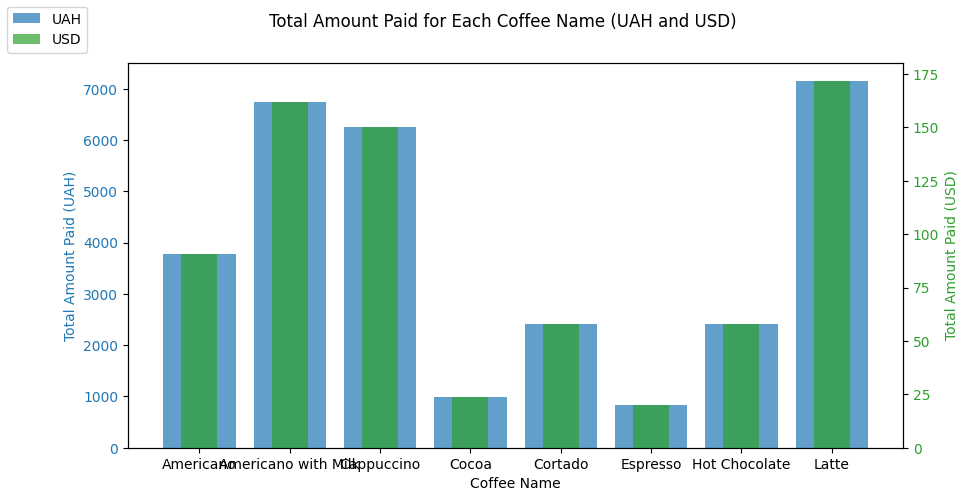

In [28]:
# Create a plot with dual y-axes
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot UAH data
color = 'tab:blue'
ax1.set_xlabel('Coffee Name')
ax1.set_ylabel('Total Amount Paid (UAH)', color=color)
bars1 = ax1.bar(total_revenue_uah_coffee.index, total_revenue_uah_coffee, alpha=0.7, label='UAH', color=color,  align='center')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for USD data
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total Amount Paid (USD)', color=color)
bars2 = ax2.bar(total_revenue_usd_coffee.index, total_revenue_usd_coffee, alpha=0.7, label='USD', color=color, width=0.4)
ax2.tick_params(axis='y', labelcolor=color)

plt.xticks(rotation=45)

# Title and legend
fig.suptitle('Total Amount Paid for Each Coffee Name (UAH and USD)')
fig.legend([bars1, bars2], ['UAH', 'USD'], loc='upper left')

# plt.savefig('./visualizations/Total Amount Paid for Each Coffee Name (UAH and USD).jpg')
# plt.close()
# Show plot
plt.show()

##### Average amount paid per cup

In [29]:
# Average amount paid per cup
df['amount_paid_uah'].mean()

np.float64(34.14390625)

##### Average Amount Paid by Coffee Name UAH and USD

In [30]:
# 2. Average Amount Paid per Cup in UAH and USD
average_amount_paid_uah = grouped_coffee['amount_paid_uah'].mean()
average_amount_paid_usd = grouped_coffee['amount_paid_usd'].mean()
print(average_amount_paid_uah)
print(average_amount_paid_usd)

coffee_name
Americano              28.469323
Americano with Milk    33.192808
Cappuccino             38.131098
Cocoa                  38.294615
Cortado                28.503529
Espresso               23.638286
Hot Chocolate          38.372381
Latte                  38.243957
Name: amount_paid_uah, dtype: float64
coffee_name
Americano              0.683264
Americano with Milk    0.796627
Cappuccino             0.915146
Cocoa                  0.919071
Cortado                0.684085
Espresso               0.567319
Hot Chocolate          0.920937
Latte                  0.917855
Name: amount_paid_usd, dtype: float64


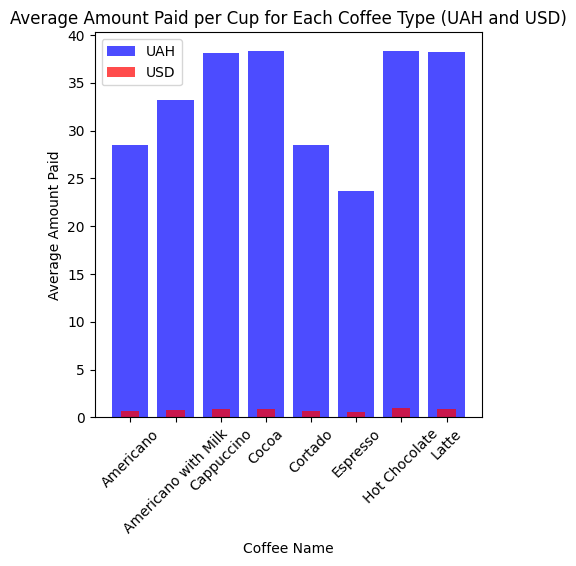

In [32]:
# Plot average amount paid per cup for each coffee type in UAH and USD
plt.figure(figsize=(5, 5))
plt.bar(average_amount_paid_uah.index, average_amount_paid_uah, alpha=0.7, label='UAH', color='blue')
plt.bar(average_amount_paid_usd.index, average_amount_paid_usd, alpha=0.7, label='USD', color='red', width=0.4)
plt.xlabel('Coffee Name')
plt.ylabel('Average Amount Paid')
plt.title('Average Amount Paid per Cup for Each Coffee Type (UAH and USD)')
plt.legend()
plt.xticks(rotation=45)
# plt.savefig('./visualizations/Average Amount Paid per Cup for Each Coffee Type (UAH and USD).jpg')
# plt.close()
plt.show()

##### Top Highest Revenue Earning Coffee Names

In [33]:
total_revenue_uah_coffee = df.groupby('coffee_name')['amount_paid_uah'].sum().reset_index()

In [34]:
total_revenue_sorted = total_revenue_uah_coffee.sort_values('amount_paid_uah', ascending=False)

In [35]:
# total_revenue_sorted = total_revenue_sorted.head()
print("Top Highest Revenue Earning Coffees (UAH) Table:")
total_revenue_sorted.head(8)

Top Highest Revenue Earning Coffees (UAH) Table:


,coffee_name,amount_paid_uah
7,Latte,7151.62
1,Americano with Milk,6738.14
2,Cappuccino,6253.50
0,Americano,3786.42
4,Cortado,2422.80
6,Hot Chocolate,2417.46
3,Cocoa,995.66
5,Espresso,827.34


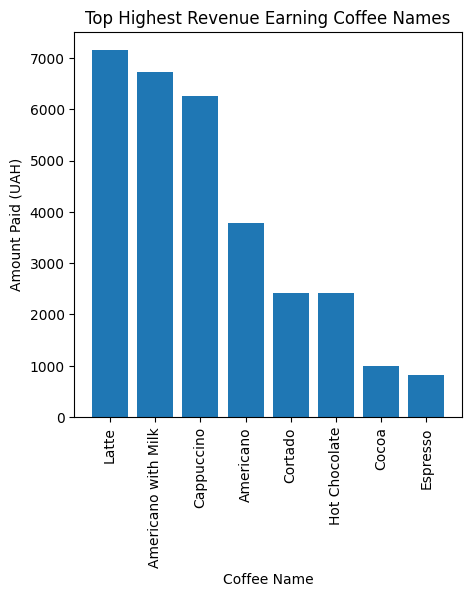

In [36]:
# Top Highest Revenue Earning Coffee Names
plt.figure(figsize=(5, 5))
plt.bar(total_revenue_sorted['coffee_name'], total_revenue_sorted['amount_paid_uah'])
plt.xlabel('Coffee Name')
plt.ylabel('Amount Paid (UAH)')
plt.xticks(rotation=90)
_ = plt.title('Top Highest Revenue Earning Coffee Names')
# plt.savefig('./visualizations/Top Highest Revenue Earning Coffee Names.jpg')
# plt.close()
plt.show()

In [37]:
# Print highest and lowest revenue earning coffee
highest_revenue_coffee = total_revenue_sorted.iloc[0]  # First row for highest
lowest_revenue_coffee = total_revenue_sorted.iloc[-1]   # Last row for lowest

print(f"Highest Revenue Earning Coffee (UAH): {highest_revenue_coffee['coffee_name']} - Amount: {highest_revenue_coffee['amount_paid_uah']}")
print(f"Lowest Revenue Earning Coffee (UAH): {lowest_revenue_coffee['coffee_name']} - Amount: {lowest_revenue_coffee['amount_paid_uah']}")


Highest Revenue Earning Coffee (UAH): Latte - Amount: 7151.62
Lowest Revenue Earning Coffee (UAH): Espresso - Amount: 827.34


##### Top 3 Coffees

In [38]:
top_3_revenue_coffees = total_revenue_sorted.head(3)
print("Top 3 Highest Revenue Earning Coffees (UAH):")
top_3_revenue_coffees

Top 3 Highest Revenue Earning Coffees (UAH):


,coffee_name,amount_paid_uah
7,Latte,7151.62
1,Americano with Milk,6738.14
2,Cappuccino,6253.50


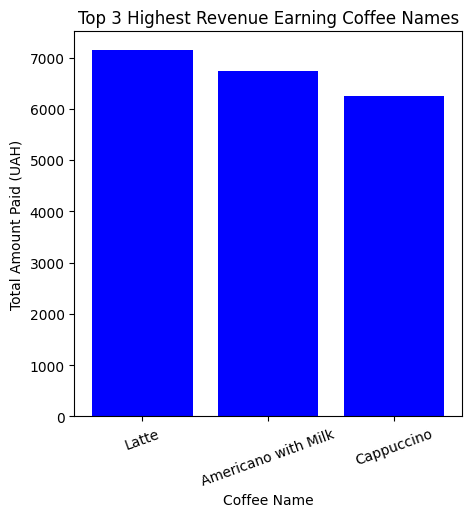

In [39]:
plt.figure(figsize=(5, 5))
plt.bar(top_3_revenue_coffees['coffee_name'], top_3_revenue_coffees['amount_paid_uah'], color='blue')
plt.xlabel('Coffee Name')
plt.ylabel('Total Amount Paid (UAH)')
plt.xticks(rotation=20)
plt.title('Top 3 Highest Revenue Earning Coffee Names')
# plt.savefig('./visualizations/Top 3 Highest Revenue Earning Coffee Names.jpg')
# plt.close()
plt.show()

### Dates and Time analysis:

In [40]:
df.head

<bound method NDFrame.head of            date                datetime          time payment_type  \
0    2024-03-01 2024-03-01 10:15:50.520  10:15:50.520         card   
1    2024-03-01 2024-03-01 12:19:22.539  12:19:22.539         card   
2    2024-03-01 2024-03-01 12:20:18.089  12:20:18.089         card   
3    2024-03-01 2024-03-01 13:46:33.006  13:46:33.006         card   
4    2024-03-01 2024-03-01 13:48:14.626  13:48:14.626         card   
5    2024-03-01 2024-03-01 15:39:47.726  15:39:47.726         card   
6    2024-03-01 2024-03-01 16:19:02.756  16:19:02.756         card   
7    2024-03-01 2024-03-01 18:39:03.580  18:39:03.580         card   
8    2024-03-01 2024-03-01 19:22:01.762  19:22:01.762         card   
9    2024-03-01 2024-03-01 19:23:15.887  19:23:15.887         card   
10   2024-03-01 2024-03-01 19:29:17.391  19:29:17.391         card   
11   2024-03-02 2024-03-02 10:22:06.957  10:22:06.957         card   
12   2024-03-02 2024-03-02 10:30:35.668  10:30:35.668       

#### Sales by Transaction Date

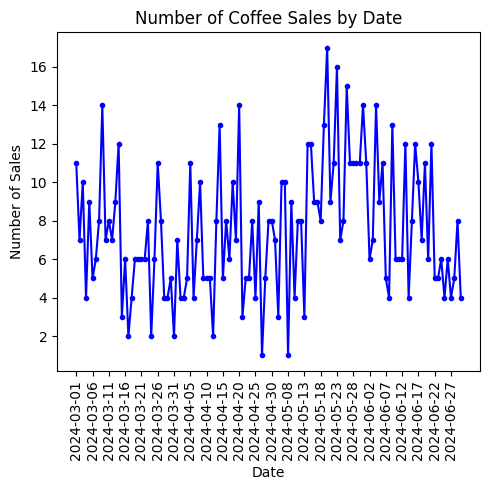

In [49]:
number_of_sales_by_date = df['date'].value_counts().sort_index()
number_of_sales_by_date
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(number_of_sales_by_date.index, number_of_sales_by_date.values, 'b.-') 


plt.xticks(number_of_sales_by_date.index[::5], rotation=90)
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('Number of Coffee Sales by Date')
# plt.legend()
plt.tight_layout()

plt.show()


#### Dates With the Highest Number of Sales

In [51]:
df['date'].value_counts()

date
2024-05-20    17
2024-05-23    16
2024-05-26    15
2024-06-04    14
2024-05-31    14
2024-03-09    14
2024-04-20    14
2024-05-19    13
2024-06-09    13
2024-04-14    13
2024-05-14    12
2024-06-21    12
2024-06-16    12
2024-06-13    12
2024-05-15    12
2024-03-14    12
2024-05-22    11
2024-03-26    11
2024-05-28    11
2024-04-05    11
2024-05-27    11
2024-03-01    11
2024-05-29    11
2024-06-06    11
2024-05-30    11
2024-06-19    11
2024-06-01    11
2024-04-18    10
2024-05-06    10
2024-03-03    10
2024-04-08    10
2024-05-07    10
2024-06-17    10
2024-04-26     9
2024-05-17     9
2024-03-05     9
2024-06-05     9
2024-05-21     9
2024-03-13     9
2024-05-09     9
2024-05-16     9
2024-04-24     8
2024-04-30     8
2024-05-25     8
2024-05-11     8
2024-05-12     8
2024-05-18     8
2024-06-15     8
2024-06-29     8
2024-04-29     8
2024-03-23     8
2024-03-27     8
2024-04-13     8
2024-03-08     8
2024-03-11     8
2024-04-16     8
2024-05-24     7
2024-04-01     7
2024-05-0

#### Frequency of Coffees Sold  at Times

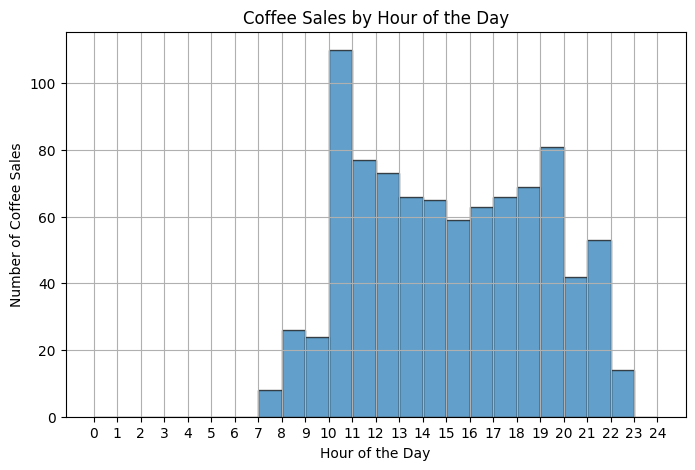

In [53]:
# Extract the hour of the day from the 'Time' column
df['hour'] = df['datetime'].dt.hour
 
# Create a histogram to visualize Coffee Sales by hour
plt.figure(figsize=(8, 5))
# plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black', alpha=0.7)
plt.hist(df['hour'], bins=24, range=(0, 24), edgecolor='black', alpha=0.7)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Coffee Sales')
plt.title('Coffee Sales by Hour of the Day')
plt.xticks(range(0, 25))
plt.grid(True)
plt.show()

In [54]:
# coffee_sales_by_hour = total_amount_paid_uah
coffee_sales_by_hour = df.groupby('hour')['coffee_name'].count()
print(coffee_sales_by_hour)

hour
7       8
8      26
9      24
10    110
11     77
12     73
13     66
14     65
15     59
16     63
17     66
18     69
19     81
20     42
21     53
22     14
Name: coffee_name, dtype: int64


In [55]:
coffee_sales_by_hour = pd.crosstab(df['hour'], df['coffee_name'])
print(coffee_sales_by_hour)

coffee_name  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
hour                                                                      
7                    4                    2           0      0        1   
8                    5                    4           7      0        4   
9                    3                    7           1      1        3   
10                  16                   22           9      3        7   
11                  14                   16          13      1       12   
12                  13                   20          13      2        7   
13                  18                   13          10      1       11   
14                  13                   17          13      2        6   
15                  14                   13           7      0        3   
16                  10                   12          10      3       11   
17                   8                    9          14      4        5   
18                   9   

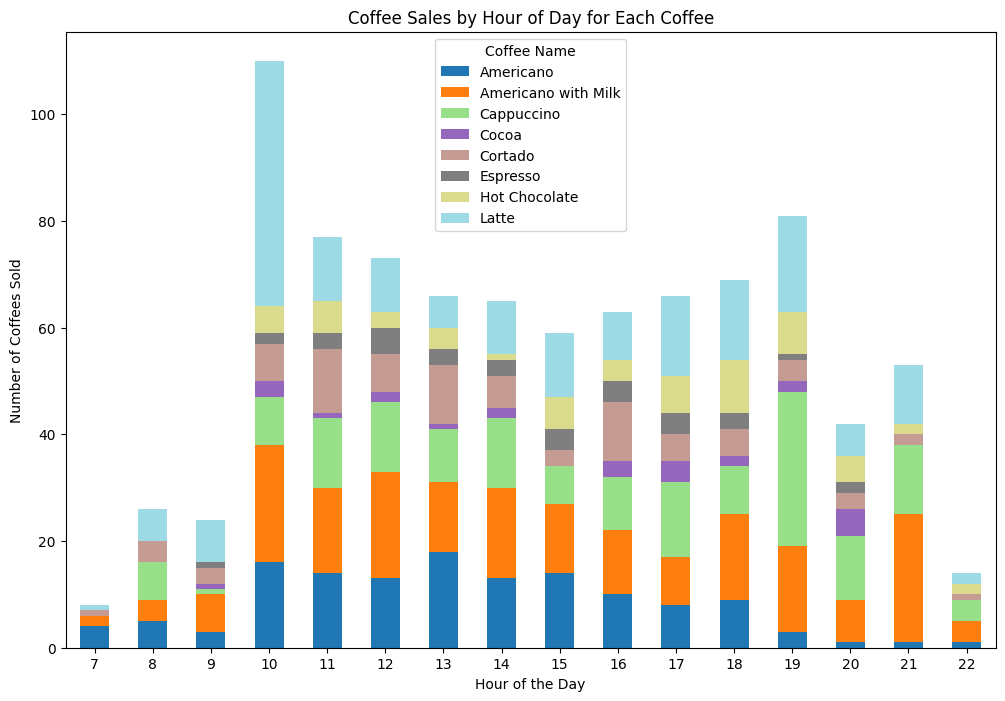

In [56]:
coffee_sales_by_hour.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Coffee Sales by Hour of Day for Each Coffee')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Coffees Sold')
plt.legend(title='Coffee Name')
plt.xticks(rotation=0)
plt.show()

In [63]:
total_sales = coffee_sales_by_hour.sum()

# Sort in ascending order
sorted_sales_ascending = total_sales.sort_values(ascending=False)
print("Ascending Order:\n", sorted_sales_ascending)

Ascending Order:
 coffee_name
Americano with Milk    203
Latte                  187
Cappuccino             164
Americano              133
Cortado                 85
Hot Chocolate           63
Espresso                35
Cocoa                   26
dtype: int64


### Popularity of Coffee Orders

In [58]:
hourly_sales = grouped_coffee['hour'].sum()
print(hourly_sales)

coffee_name
Americano              1769
Americano with Milk    3036
Cappuccino             2583
Cocoa                   405
Cortado                1175
Espresso                508
Hot Chocolate          1009
Latte                  2643
Name: hour, dtype: int32


In [ ]:
total_amount_paid_uah

In [ ]:
# if df['time'] 
# df['time_pod'] = df['time']
# morning = 06:00:00 - 12:00:00
# afternoon =12:01:00 - 18:00:00
# evening =  18:01:00- 00:00:00
# night = 00:01:00 - 06:00:00

#### Categorize Morning, Afternoon and Evening

morning is 6am-12pm  --> 06:00:00 - 12:00:00

afternoon is 12pm - 6pm -->  12:01:00 - 18:00:00

evening is 6pm - 12 am -->  18:01:00- 00:00:00

night 12am - 6am -->  00:00:00 - 06:00:00

##### First Conditional Approach
using function to filter on time condition into day cylce categorizatioin

In [64]:
def day_cycle(hour):
    if 6 <= hour <= 11:
        return 'morning'
    elif 12 <= hour <= 17:
        return 'afternoon'
    elif 18 <= hour <= 23:
        return 'evening'
    elif 0 <= hour <= 5:
        return 'night'

df['day_cycle'] = df['hour'].apply(day_cycle)
print(df['day_cycle'])

0        morning
1      afternoon
2      afternoon
3      afternoon
4      afternoon
5      afternoon
6      afternoon
7        evening
8        evening
9        evening
10       evening
11       morning
12       morning
13       morning
14       morning
15     afternoon
16     afternoon
17     afternoon
18       morning
19       morning
20       morning
21     afternoon
22     afternoon
23     afternoon
24     afternoon
25       evening
26       evening
27       evening
28       morning
29       morning
30       morning
31     afternoon
32       morning
33     afternoon
34     afternoon
35     afternoon
36     afternoon
37     afternoon
38     afternoon
39     afternoon
40       evening
41     afternoon
42     afternoon
43     afternoon
44     afternoon
45     afternoon
46       morning
47       morning
48       morning
49       morning
50     afternoon
51     afternoon
52       morning
53     afternoon
54     afternoon
55     afternoon
56     afternoon
57     afternoon
58       eveni

##### Second Lambda Approach
using lambda to filter on time condition into day cylce categorizatioin

In [65]:
df['day_cycle'] = df['hour'].apply(lambda hour: 'morning' if 6 <= hour <= 11 else 
                                                'afternoon' if 12 <= hour <= 17 else 
                                                'evening' if 18 <= hour <= 23  else 
                                                'night')

df['day_cycle'].value_counts()

day_cycle
afternoon    392
evening      259
morning      245
Name: count, dtype: int64

#### Coffee Sales by the Weekday

In [66]:
# weekday_sales = 
df['datetime'].dt.day_name().value_counts()
# weekday_sales.plot(kind='bar')
# plt.show()

# order the days of the week

datetime
Thursday     137
Tuesday      136
Saturday     127
Sunday       127
Monday       127
Friday       124
Wednesday    118
Name: count, dtype: int64

#### Days of the Week with the Highest Number of Sales


#### Holiday Effects on Coffee Sales

### Consumer Analysis

#### Card Numbers With the Most Purchases

#### Ratio amongst CArd Consumers and Cash Spenders

#### Revenue Comparison amongst Card Consumers and Cash Spenders respect to ratio

### Currency Analysis

#### Exchange Rate analysis 